<a href="https://colab.research.google.com/github/PrINcE16161/ML-Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.3 MB/s eta 0:00:00
time: 424 µs (started: 2024-01-24 10:52:59 +00:00)


In [ ]:
# Data : Images
# 1. Download manually the images from google
# 2. Download dataset from kaggle.com
# 3. Build a Image Web Crawler
# 4. Use python libraries to scrape the images (Using) (bing.com)

time: 459 µs (started: 2024-01-23 10:25:34 +00:00)


In [ ]:
!pip install bing-image-downloader

time: 10.6 s (started: 2024-01-24 10:53:08 +00:00)


In [ ]:
!mkdir images

time: 104 ms (started: 2024-01-24 10:53:23 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("men", limit=30, output_dir='images', adult_filter_off=True)

[%] Downloading Images to /content/images/men


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/e5/ef/ad/e5efad10a90a072c715d55b476c2b3d6.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://onlineshoppingfreak.com/wp-content/uploads/2016/06/Fotolia_90886446_Subscription_Monthly_M.jpg
[!] Issue getting: http://onlineshoppingfreak.com/wp-content/uploads/2016/06/Fotolia_90886446_Subscription_Monthly_M.jpg
[!] Error:: <urlopen error [Errno -3] Temporary failure in name resolution>
[%] Downloading Image #2 from https://i.pinimg.com/736x/4c/fc/8b/4cfc8b69350f39c14a56d4ea79ed63a9.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://fashionablymale.net/wp-content/uploads/2015/05/men-tomas-maier-cruise16-david-schulze-look03.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/c5/59/bf/c559bfe36fcaa24deba7df9e4554e010.jpg
[%] File Downloaded !

[%] Downloading Image #

In [ ]:
downloader.download("women", limit=30, output_dir='images', adult_filter_off=True)

[%] Downloading Images to /content/images/women


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.brandedgirls.com/wp-content/uploads/2015/10/130.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-Ggml0phl4HU/Th746fl5snI/AAAAAAAAAPg/eHJZ9tgSEUE/s1600/s_istock_000011271336medium.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://static1.businessinsider.com/image/52716a64eab8ea074ffb2959/meet-the-woman-hp-has-put-in-charge-of-taking-down-its-big-rival-cisco.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.internationallovescout.com/wp-content/uploads/2020/02/monika-jagaciak-sexy-polish-fashion-model-1152x1536.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://vistapointe.net/images/women-7.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://jooinn.com/images/pretty-girl-15.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://susanshacte

In [ ]:
downloader.download("baby", limit=30, output_dir='images', adult_filter_off=True)

[%] Downloading Images to /content/images/baby


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://images2.fanpop.com/image/photos/8800000/Baby-babies-8803234-2389-1713.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.drupal.org/files/project-images/Baby_Face.JPG
[%] File Downloaded !

[%] Downloading Image #3 from https://www.goodfreephotos.com/albums/people/smiling-baby.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://2.bp.blogspot.com/-ElZIb-gFtZY/UuokEI25vWI/AAAAAAAAAoU/O45UNMdN_a0/s1600/ubtan+for+babies.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://loonylabs.files.wordpress.com/2015/01/talking-to-babies.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://media1.santabanta.com/full1/Miscellaneous/Baby/baby-146a.jpg
[!] Issue getting: http://media1.santabanta.com/full1/Miscellaneous/Baby/baby-146a.jpg
[!] Error:: <urlopen error [Errno -3] Temporary failure in name resolution

# Pre-Processing

In [ ]:
# 1. Resizing
# 2. Flatten()

In [ ]:
import numpy as np

a = np.array([[1,2,3,4,5],[4,5,6,7,8]])
a.ndim

2

time: 4.84 ms (started: 2024-01-24 10:55:36 +00:00)


In [ ]:
#How to convert matrix to vector? - flatten()
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 4.7 ms (started: 2024-01-24 10:55:37 +00:00)


In [ ]:
import os
import matplotlib.pyplot as plt #display image
import numpy as np #numerical calculating
from skimage.io import imread #reading image(other used opencv)
from skimage.transform import resize #all image not specific size in ml

#input and output format data
#pixel form of h x w

target = []
images = [] #2d
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['men', 'women', 'baby']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #Label Encoding the values
  #print(class_num)
  path = os.path.join(DATADIR, category) #Create path to use all the images
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    #print(img_array)
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) #Normalization 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 1min 9s (started: 2024-01-24 10:55:40 +00:00)


In [ ]:
flat_data[0]

array([0.89028444, 0.89896479, 0.91337192, ..., 0.76336219, 0.69901909,
       0.64280208])

time: 5.58 ms (started: 2024-01-24 10:57:05 +00:00)


In [ ]:
len(flat_data[0])

67500

time: 2.35 ms (started: 2024-01-24 02:29:57 +00:00)


In [ ]:
150*150*3

67500

time: 3.23 ms (started: 2024-01-23 11:07:47 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 3.98 ms (started: 2024-01-24 10:57:14 +00:00)


<BarContainer object of 3 artists>

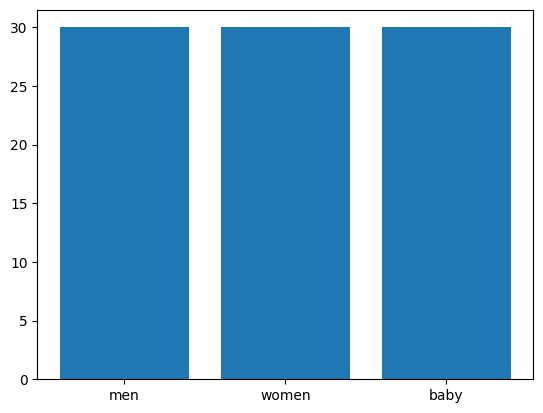

time: 197 ms (started: 2024-01-24 10:57:17 +00:00)


In [ ]:
unique,count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count)

# Split Data into Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, target,
                                                 test_size=0.3, random_state=109)

time: 201 ms (started: 2024-01-24 10:57:21 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C':[1,10,100,1000],'kernel':['liner']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['liner']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 43 s (started: 2024-01-24 10:57:27 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0])

time: 214 ms (started: 2024-01-24 10:58:22 +00:00)


In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 3.46 ms (started: 2024-01-24 10:58:27 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 510 µs (started: 2024-01-24 10:58:30 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.5185185185185185

time: 5.3 ms (started: 2024-01-24 10:58:34 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 8, 11,  2],
       [ 0,  0,  0],
       [ 0,  0,  6]])

time: 5.19 ms (started: 2024-01-24 10:58:36 +00:00)


In [ ]:
# Save the model using Pickle library
import pickle
pickle.dump(clf, open('img_model.p','wb'))

time: 76.9 ms (started: 2024-01-24 10:58:39 +00:00)


In [ ]:
model = pickle.load(open('img_model.p', 'rb'))

time: 27.3 ms (started: 2024-01-24 10:58:43 +00:00)


Enter your URLhttps://img.freepik.com/free-photo/cheerful-indian-businessman-smiling-closeup-portrait-jobs-career-campaign_53876-129417.jpg?w=996&t=st=1706093932~exp=1706094532~hmac=836b95e5ce50ababa5d27a5f9cd3d5d37d378d37c346dfa76da8150ed235586d
(664, 996, 3)
PREDICTED OUTPUT: men


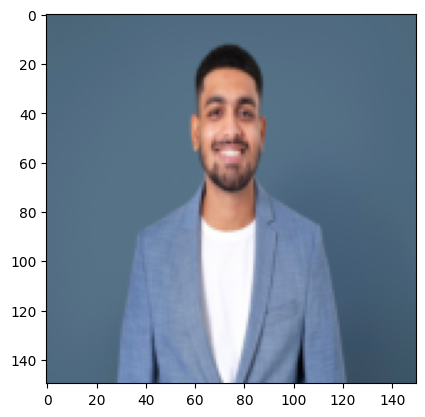

time: 12.1 s (started: 2024-01-24 10:58:47 +00:00)


In [ ]:
# Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img, (150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

ngrok.set_auth_token("2bNmbBDex3UAWRb9x3ySJbNHKqw_2bPNGGjeAfajY8ng4RgeY")

time: 15.2 s (started: 2024-01-24 11:03:19 +00:00)


# Deployment

In [ ]:
# 1. WebPage - HTML/CSS/JS -Flask/Django
# 2. WebApp - Streamlit/Dash
# 3. Mobile App - Kotlin/Java

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np #numerical calculating
from skimage.io import imread #reading image(other used opencv)
from skimage.transform import resize #all image not specific size in ml
from PIL import Image
import pickle

st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p', 'rb'))

uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img, caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['men', 'women', 'baby']
    st.write('Result...')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img, (150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')

Writing app.py
time: 9.93 ms (started: 2024-01-24 10:59:29 +00:00)


In [ ]:
!nohup streamlit run app.py&

url = ngrok.connect()
url